In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt

In [2]:
dnn = np.load('./contours/dnn.npz')
nf = np.load('./contours/nf.npz')
cvae = np.load('./contours/cvae.npz')
bnn = np.load('./contours/bnn.npz')

In [3]:
dnn_arr = dnn['arr_0']
nf_arr = nf['arr_0']
cvae_arr = cvae['arr_0']
bnn_arr = bnn['arr_0']

In [4]:
N_DUNE, N_T2HK, N_DUT2 = 92, 36, 96
theta23_DUNE, delta_cp_DUNE, chi_DUNE = [], [], []
theta23_T2HK, delta_cp_T2HK, chi_T2HK = [], [], []
theta23_DUT2, delta_cp_DUT2, chi_DUT2 = [], [], []

In [5]:
f_DUNE = open("../../Data/chi_square-4-2_figB_DUNE.txt")
for i in range(N_DUNE):
    s = f_DUNE.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    theta23_DUNE.append(array[0])
    delta_cp_DUNE.append(array[1]) 
    chi_DUNE.append(array[2])
f_DUNE.close()

In [6]:
theta23_DUNE = np.array(theta23_DUNE)
delta_cp_DUNE = np.array(delta_cp_DUNE)
chi_DUNE = np.array(chi_DUNE)

In [7]:
x0 = np.linspace(min(theta23_DUNE)-3, max(theta23_DUNE)+3, 68)
y0 = np.linspace(min(delta_cp_DUNE)-6, max(delta_cp_DUNE)+6, 20)
X0, Y0 = np.meshgrid(x0, y0)
Z0 = np.zeros((len(X0),len(X0[0])))

for i in range(len(theta23_DUNE)):
    a = np.where(X0 == theta23_DUNE[i])[1][0]
    b = np.where(Y0 == delta_cp_DUNE[i])[0][0]
    Z0[b][a] = 1

/tmp/ipykernel_888766/546456364.py:46: UserWarning: No contour levels were found within the data range.
  plt.contour(X0, Y0, Z0, 0, colors='black', linestyles="-", linewidths=1)


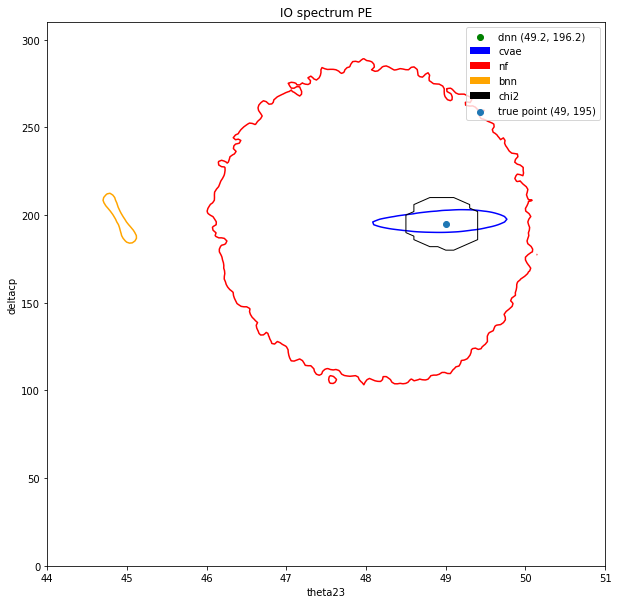

In [18]:
plt.figure(figsize=(10,10))
range = [[44,51], [0, 310]]
dnn_prediction = plt.scatter(49.188957, 196.26898, c='green')
corner.hist2d(cvae_arr[:, 1]*180/np.pi, cvae_arr[:, 2]*180/np.pi,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='blue',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )
corner.hist2d(nf_arr[:, 1], nf_arr[:, 2],
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='red',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )
corner.hist2d(bnn_arr[:, 1]*180/np.pi, bnn_arr[:, 2]*180/np.pi,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='orange',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )
plt.contour(X0, Y0, Z0, 0, colors='black', linestyles="-", linewidths=1)
true_point = plt.scatter(49, 195, label = "true point")
proxy = [plt.Rectangle((2, 2), 0.0, 3, 90, fc=c) for c in ['blue', 'red', 'orange', 'black']]
plt.legend([dnn_prediction] + proxy + [true_point], ["dnn (49.2, 196.2)", "cvae", "nf", "bnn", "chi2", "true point (49, 195)"])
plt.title("IO spectrum PE")
plt.xlabel('theta23')
plt.ylabel('deltacp')
plt.show()